# Fourier Transform

The Fourier Transform (FT) is an important image processing tool which is used to decompose an image into its frequency components. The output of an FT represents the image in the frequency domain, while the input image is the spatial domain (x, y) equivalent. In the frequency domain image, each point represents a particular frequency contained in the spatial domain image. So, for images with a lot of high-frequency components (edges, corners, and stripes), there will be a number of points in the frequency domain at high frequency values.

**This decomposition is particularly interesting in the context of bandpass filters, which can isolate a certain range of frequencies and mask an image according to a low and high frequency threshold.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#read image
image_stripes = cv2.imread('images/stripes.jpg')

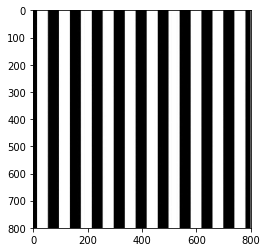

In [5]:
plt.imshow(image_stripes)

In [8]:
# change color to rgb
image_solid = cv2.imread('images/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

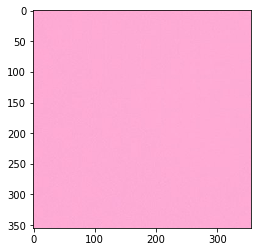

In [10]:
plt.imshow(image_solid)

Text(0.5, 1.0, 'Image Solid')

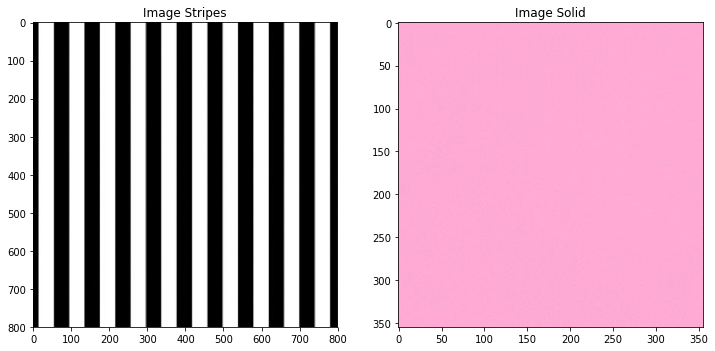

In [12]:
f, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(image_stripes)
ax[0].set_title("Image Stripes")
ax[1].imshow(image_solid)
ax[1].set_title("Image Solid")

In [15]:
#covert to grayscale
gray_stripes = cv2.cvtColor(image_stripes,cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid,cv2.COLOR_RGB2GRAY)

In [16]:
#normalize
norm_stripes = gray_stripes / 255.0
norm_solid = gray_solid / 255.0

In [17]:
def ft_image(norm_image):
    '''
    The function takes in a normalized grayscale image
    and returns a frequency spectrum transform if that image
    '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    return frequency_tx

In [18]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

Text(0.5, 1.0, 'Frequency Transform Image Solid')

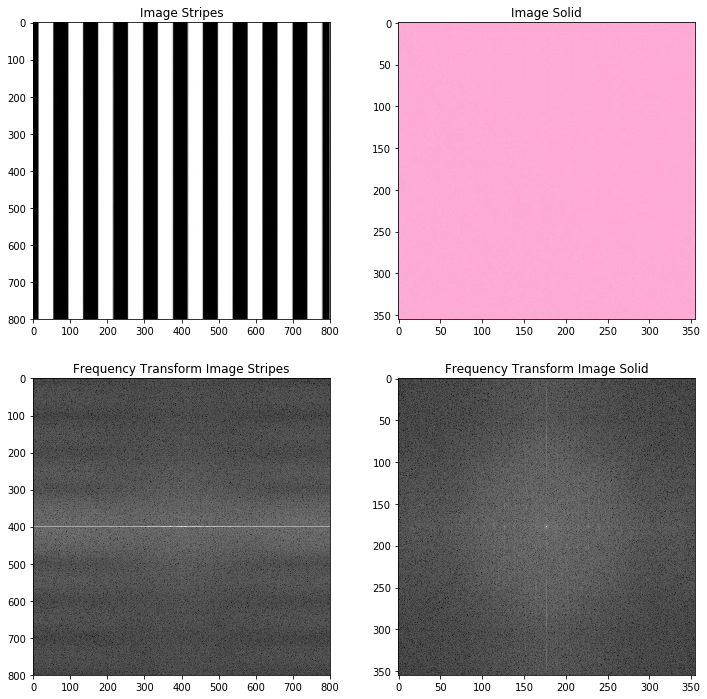

In [22]:
f, ax = plt.subplots(2,2,figsize=(12,12))
ax[0][0].imshow(image_stripes)
ax[0][0].set_title("Image Stripes")
ax[0][1].imshow(image_solid)
ax[0][1].set_title("Image Solid")
ax[1][0].imshow(f_stripes,cmap="gray")
ax[1][0].set_title("Frequency Transform Image Stripes")
ax[1][1].imshow(f_solid,cmap="gray")
ax[1][1].set_title("Frequency Transform Image Solid")

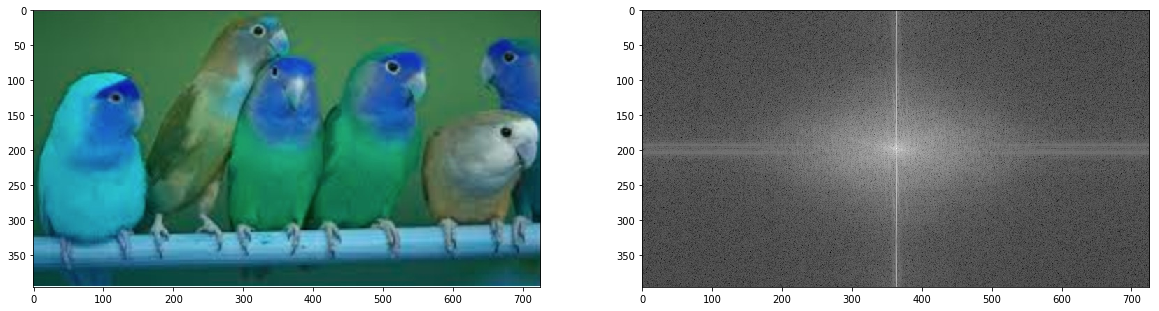

In [23]:
image = cv2.imread('images/birds.jpg')
image - cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
norm_image = gray/255.0
f_image = ft_image(norm_image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax2.imshow(f_image,cmap="gray")